In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from itertools import product  # Import for confusion matrix plot

In [ ]:
#url= 'https://www.kaggle.com/competitions/titanic/data'

data = pd.read_csv('/Titanic-Dataset.csv')

In [ ]:
# Loading the dataset
#data = pd.read_csv(url)

In [ ]:
# Initial examination of the data
data.head()
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
# Check for collinearity using correlation matrix
#correlation_matrix = data.corr()

# Display the correlation matrix
#print(correlation_matrix)

# Address collinearity (example: remove one of the highly correlated features)
#data = data.drop(columns=['feature_to_remove'])

After initial observation, it can be observed that there are missing values in Age, Cabin and Embarked.

In [ ]:
# Data preprocessing
# Handling missing values
data['Age'].fillna(data['Age'].mean(), inplace=True) # imputation
data.drop('Cabin', axis=1, inplace=True)  # Remove the 'Cabin' column
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True) #imputation



In [ ]:
# Rechecking for any missing values
data.head()
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
# Check for collinearity using correlation matrix
correlation_matrix = data.corr()

# Display the correlation matrix
print(correlation_matrix)

# Address collinearity (example: remove one of the highly correlated features)
#data = data.drop(columns=['feature_to_remove'])

             PassengerId  Survived    Pclass       Age     SibSp     Parch  \
PassengerId     1.000000 -0.005007 -0.035144  0.033207 -0.057527 -0.001652   
Survived       -0.005007  1.000000 -0.338481 -0.069809 -0.035322  0.081629   
Pclass         -0.035144 -0.338481  1.000000 -0.331339  0.083081  0.018443   
Age             0.033207 -0.069809 -0.331339  1.000000 -0.232625 -0.179191   
SibSp          -0.057527 -0.035322  0.083081 -0.232625  1.000000  0.414838   
Parch          -0.001652  0.081629  0.018443 -0.179191  0.414838  1.000000   
Fare            0.012658  0.257307 -0.549500  0.091566  0.159651  0.216225   

                 Fare  
PassengerId  0.012658  
Survived     0.257307  
Pclass      -0.549500  
Age          0.091566  
SibSp        0.159651  
Parch        0.216225  
Fare         1.000000  


<ipython-input-178-973fce8af944>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


In [ ]:
# Data Visualization
# Let's create a pair plot to visualize relationships between some features
#sns.pairplot(data, hue="Survived", vars=[ "mean_Survived", "mean_Pclass", "mean_Age" , "mean_SibSp" , "mean_Parch" , "mean_Fare"], markers=["2","x"])
#plt.title("Pair Plot of Features")
#plt.show()

In [ ]:
# convert Survived to binary (M: 1, B: 0)
data["Survived"] = data["Survived"].map({0: 0, 1: 1})

In [ ]:
# Defining new features
# Define age group bins and labels
age_bins = [0, 18, 30, 50, 100]
age_labels = ['Child', 'Young Adult', 'Adult', 'Senior']


In [ ]:
# Feature Engineering
data['FamilySize'] = data['SibSp'] + data['Parch']
data['Title'] = data['Name'].str.extract(' ([A-Za-z]+)\.')
data['AgeGroup'] = pd.cut(data['Age'], bins=age_bins, labels=age_labels)

In [ ]:
# Transform categorical variables into numerical format using one-hot encoding
data = pd.get_dummies(data, columns=['Sex', 'Embarked', 'Ticket' , 'Name' , 'Title' , 'AgeGroup'], drop_first=True)


In [ ]:
data.head()
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Columns: 1600 entries, PassengerId to AgeGroup_Senior
dtypes: float64(2), int64(6), uint8(1592)
memory usage: 1.4 MB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize,Sex_male,Embarked_Q,...,Title_Mlle,Title_Mme,Title_Mr,Title_Mrs,Title_Ms,Title_Rev,Title_Sir,AgeGroup_Young Adult,AgeGroup_Adult,AgeGroup_Senior
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,...,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,0.904602,0.647587,0.086420,...,0.002245,0.001122,0.580247,0.140292,0.001122,0.006734,0.001122,0.501684,0.270483,0.071829
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429,1.613459,0.477990,0.281141,...,0.047351,0.033501,0.493796,0.347485,0.033501,0.081830,0.033501,0.500278,0.444459,0.258350
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200,0.000000,1.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,10.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
#data.dropna(subset=['Survived'], inplace=True)

In [ ]:
# Check for NaN values in the 'Survived' column
#nan_values_in_y = data['Survived'].isna().sum()
#print("Number of NaN values in 'Survived':", nan_values_in_y)

In [ ]:
# Split data into features and target
X = data.drop("Survived" , axis=1)
y = data["Survived"]

In [ ]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [ ]:
# Normalizing the feature data to have zero mean and unit variance
# Feature scaling using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
# Model making, training, and predictions
# Logistic Regression model training
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

In [ ]:
# Perform cross-validation
scores = cross_val_score(model, X_train , y_train , cv=5)  # 5-fold cross-validation

In [ ]:
# Define a range of hyperparameter values to experiment with
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization strength
    'max_iter': [1000, 2000, 3000],  # Maximum iterations
    # Add other hyperparameters to tune as needed
}

# Create a grid search for hyperparameter tuning with cross-validation
grid_search = GridSearchCV(model, param_grid, cv=5)  # 5-fold cross-validation

# Fit the grid search to your data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Train a new logistic regression model with the best hyperparameters
best_logistic_model = LogisticRegression(**best_params)
best_logistic_model.fit(X_train, y_train)

LogisticRegression(C=0.1, max_iter=1000)

In [ ]:
# Make predictions on the test set
#y_pred = best_logistic_reg.predict(X_test)
y_pred = grid_search.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Calculate precision
precision = precision_score(y_test, y_pred)
print(f"Precision: {precision:.2f}")

# Calculate recall
recall = recall_score(y_test, y_pred)
print(f"Recall: {recall:.2f}")

# Calculate F1 score
f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {f1:.2f}")

Accuracy: 0.83
Precision: 0.89
Recall: 0.66
F1 Score: 0.76


Accuracy: 0.8268156424581006


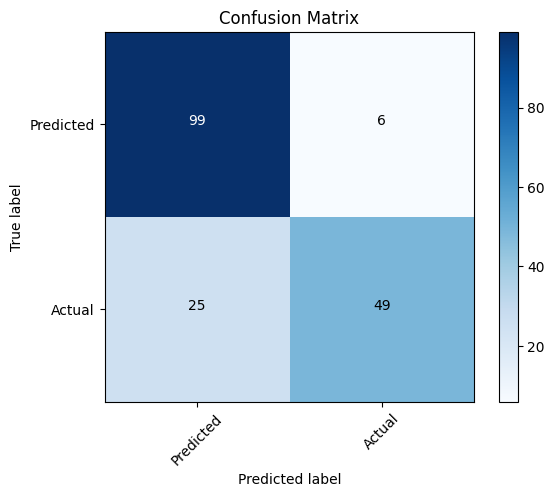

In [ ]:
#Model Evaluation

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)


# Print the accuracy
print("Accuracy:", accuracy)

# Confusion matrix
# Visualization of the confusion matrix
def plot_confusion_matrix(cm):
    plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
    plt.title("Confusion Matrix")
    plt.colorbar()
    classes = ["Predicted", "Actual"]
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

    plt.ylabel("True label")
    plt.xlabel("Predicted label")

# Plot the confusion matrix
plt.figure()
plot_confusion_matrix(confusion)
plt.show()




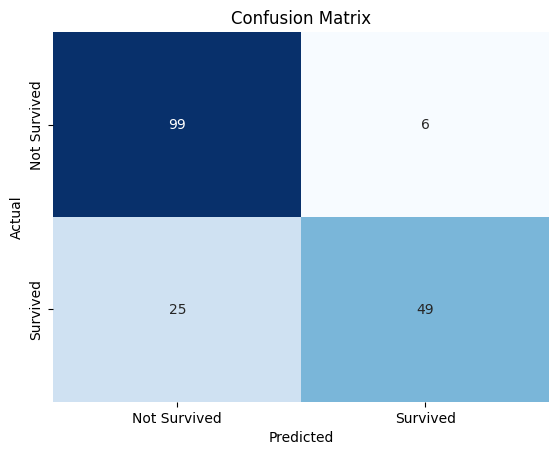

In [ ]:
# Create a heatmap for the confusion matrix
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()